In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['price']=data.target

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df=df.sample(frac=0.20)

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
9131,5.0830,4.0,6.968607,1.115762,5391.0,3.525834,34.57,-118.02
11423,5.3737,26.0,6.211679,0.985401,1337.0,3.253041,33.71,-117.97
9336,5.0766,40.0,5.600000,1.098039,708.0,2.776471,38.01,-122.65
7377,2.1429,38.0,3.740406,1.054176,2033.0,4.589165,33.97,-118.24
2771,1.7857,19.0,7.806452,1.600000,329.0,2.122581,33.34,-115.90
...,...,...,...,...,...,...,...,...
9164,5.2887,25.0,6.344488,1.031496,1763.0,3.470472,34.42,-118.47
1322,2.7083,52.0,4.756303,0.922269,1403.0,2.947479,38.02,-121.87
13841,2.6125,26.0,5.213152,1.124717,1259.0,2.854875,34.53,-117.31
1108,2.3507,12.0,5.531073,1.042373,875.0,2.471751,39.82,-121.59


In [10]:
y

9131     1.51300
11423    2.52900
9336     3.05400
7377     1.18500
2771     0.62800
          ...   
9164     1.83000
1322     0.99400
13841    0.79900
1108     0.97600
18294    5.00001
Name: price, Length: 4128, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [15]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred=model.predict(x_test)

In [17]:
y_pred

array([2.125  , 1.625  , 1.834  , ..., 0.5    , 3.011  , 5.00001])

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_pred)

0.45060725333510665

In [21]:
parameter = {
    'criterion': ['squared_error', 'poissor'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}

In [22]:
reg=DecisionTreeRegressor()

In [23]:
from sklearn.model_selection import GridSearchCV
model =GridSearchCV(reg,param_grid=parameter,cv=5,scoring="neg_mean_squared_error")

In [24]:
model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [26]:
model.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [29]:
final_model= DecisionTreeRegressor(criterion="squared_error",max_depth=6)

In [30]:
final_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6)

[Text(0.49198717948717946, 0.9285714285714286, 'x[0] <= 5.05\nsquared_error = 1.322\nsamples = 2889\nvalue = 2.049'),
 Text(0.2329059829059829, 0.7857142857142857, 'x[0] <= 2.851\nsquared_error = 0.858\nsamples = 2306\nvalue = 1.735'),
 Text(0.12393162393162394, 0.6428571428571429, 'x[2] <= 4.335\nsquared_error = 0.503\nsamples = 926\nvalue = 1.27'),
 Text(0.06837606837606838, 0.5, 'x[0] <= 2.317\nsquared_error = 0.628\nsamples = 408\nvalue = 1.551'),
 Text(0.03418803418803419, 0.35714285714285715, 'x[2] <= 3.297\nsquared_error = 0.507\nsamples = 259\nvalue = 1.343'),
 Text(0.017094017094017096, 0.21428571428571427, 'x[5] <= 5.324\nsquared_error = 0.92\nsamples = 71\nvalue = 1.796'),
 Text(0.008547008547008548, 0.07142857142857142, 'squared_error = 0.784\nsamples = 68\nvalue = 1.734'),
 Text(0.02564102564102564, 0.07142857142857142, 'squared_error = 1.92\nsamples = 3\nvalue = 3.208'),
 Text(0.05128205128205128, 0.21428571428571427, 'x[0] <= 1.681\nsquared_error = 0.245\nsamples = 188\n

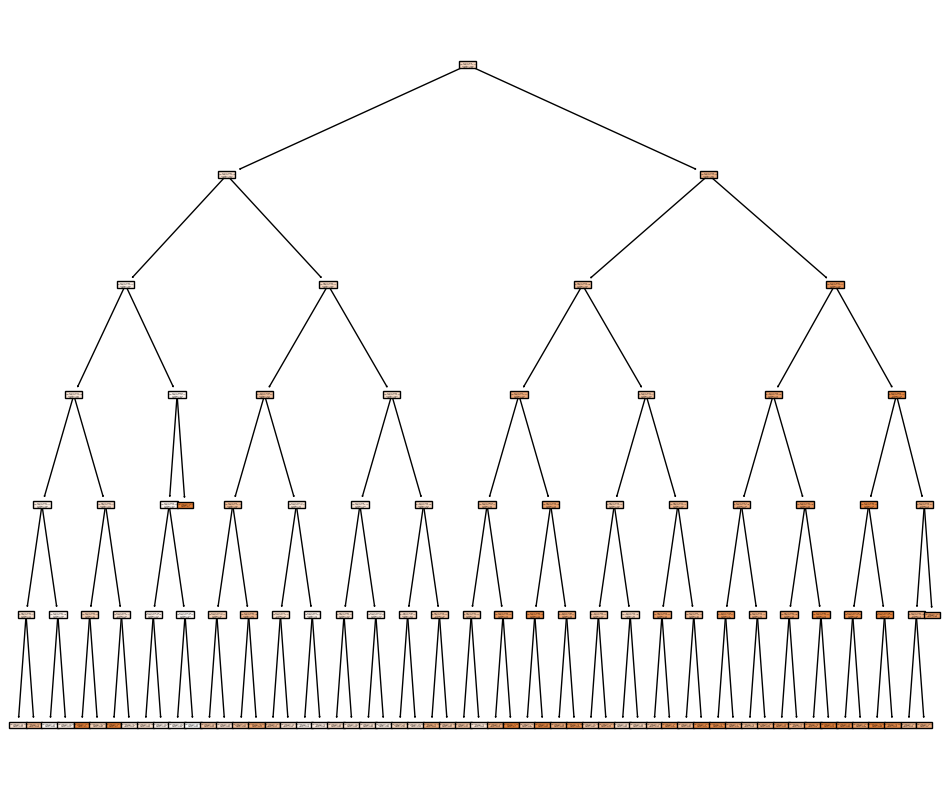

In [31]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(final_model,filled=True)

In [32]:
y_pred=model.predict(x_test)

In [33]:
y_pred

array([1.69769072, 2.89768233, 2.01431986, ..., 1.22585517, 1.34578191,
       2.62943812])

In [34]:
r2_score(y_test, y_pred)

0.5843595221070566